In [196]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [197]:
from pipeline import *
from vehicle_detection import VehicleDetectionPipeline

In [168]:
path = './data/*/*/*.jpeg'

In [169]:
p = VehicleDetectionPipeline()

In [172]:
p.preprocess_data(path=path)

preprocess_data
extract_image_paths
extract_features_for_images
extract_features_for_images
scale_feature_vectors


In [173]:
p.train()

train
Test Accuracy of SVC =  0.984946236559


In [174]:
p.X_train.shape

(1856, 8460)

In [204]:
ip = ImageProcessor('./data/test_1.jpg')

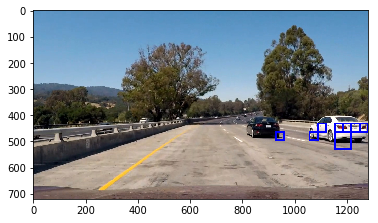

In [213]:
ip.find_vehicles(p.classifier, p.scaler)

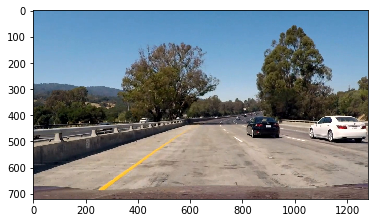

In [209]:
plt.imshow(image)
plt.show()

In [177]:
ip.add_heat()

In [178]:
ip.apply_threshold(0.5)

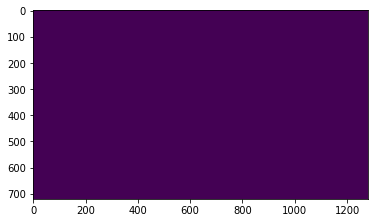

In [179]:
plt.imshow(ip.heat)
plt.show()

In [142]:
from scipy.ndimage.measurements import label


In [144]:
labels = label(ip.heat)
print(labels[1], 'cars found')
plt.imshow(labels[0], cmap='gray')

4 cars found


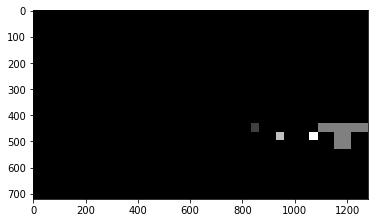

In [145]:
plt.show()

In [146]:
def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

In [147]:
# Read in the last image above
image = mpimg.imread('./data/test_1.jpg')
# Draw bounding boxes on a copy of the image
draw_img = draw_labeled_bboxes(np.copy(image), labels)
# Display the image
plt.imshow(draw_img)

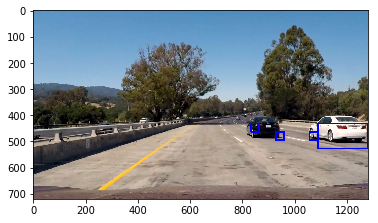

In [148]:
plt.show()